# Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression, and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision tree's habit of overfitting to their training set. 

## For classification

### Decision trees

In [29]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [30]:
RANDOM_SEED = 13

In [31]:
iris = load_iris()

In [32]:
X = iris.data

In [33]:
y = iris.target

In [34]:
X.shape

(150, 4)

In [35]:
y.shape

(150,)

In [36]:
X[0:10]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1]])

In [37]:
y[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [38]:
idx = np.arange(X.shape[0])

In [39]:
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149])

In [40]:
np.random.shuffle(idx)

In [41]:
X = X[idx]

In [42]:
y = y[idx]

In [43]:
# create and fit the model with full data

model = DecisionTreeClassifier(max_depth = None)
classifier = model.fit(X, y) 
scores = classifier.score(X, y)

In [44]:
print("Decision Tree Performance: {}".format(scores))

Decision Tree Performance: 1.0


In [45]:
import sklearn.model_selection

# cross validation
sklearn.model_selection.cross_val_score(model, X, y, cv = 5)

array([ 0.9       ,  0.96666667,  0.96666667,  0.96666667,  0.93333333])

## Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
X = iris.data
y = iris.target

In [48]:
# shuffle 
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)

In [49]:
X = X[idx]
y = y[idx]

In [50]:
model = RandomForestClassifier(n_estimators = 10)
classifier = model.fit(X, y)
scores = classifier.score(X, y)

In [51]:
print("Random Forest Performance: {}".format(scores))

Random Forest Performance: 0.9933333333333333


We were able to generalize a bit better. Let's look at the cross validation for comparison

In [53]:
sklearn.model_selection.cross_val_score(model, X, y, cv = 5)

array([ 0.96666667,  0.93333333,  0.96666667,  0.93333333,  0.96666667])

## Visuals of decision tree vs. random forest decision boundaries

DecisionTree with features [0, 1] has a score of 0.926666666667

RandomForest with 30 estimators with features [0, 1] has a score of 0.926666666667

DecisionTree with features [0, 2] has a score of 0.993333333333

RandomForest with 30 estimators with features [0, 2] has a score of 0.993333333333

DecisionTree with features [0, 3] has a score of 0.973333333333

RandomForest with 30 estimators with features [0, 3] has a score of 0.973333333333

DecisionTree with features [1, 2] has a score of 0.986666666667

RandomForest with 30 estimators with features [1, 2] has a score of 0.986666666667

DecisionTree with features [1, 3] has a score of 0.98

RandomForest with 30 estimators with features [1, 3] has a score of 0.98

DecisionTree with features [2, 3] has a score of 0.993333333333

RandomForest with 30 estimators with features [2, 3] has a score of 0.993333333333



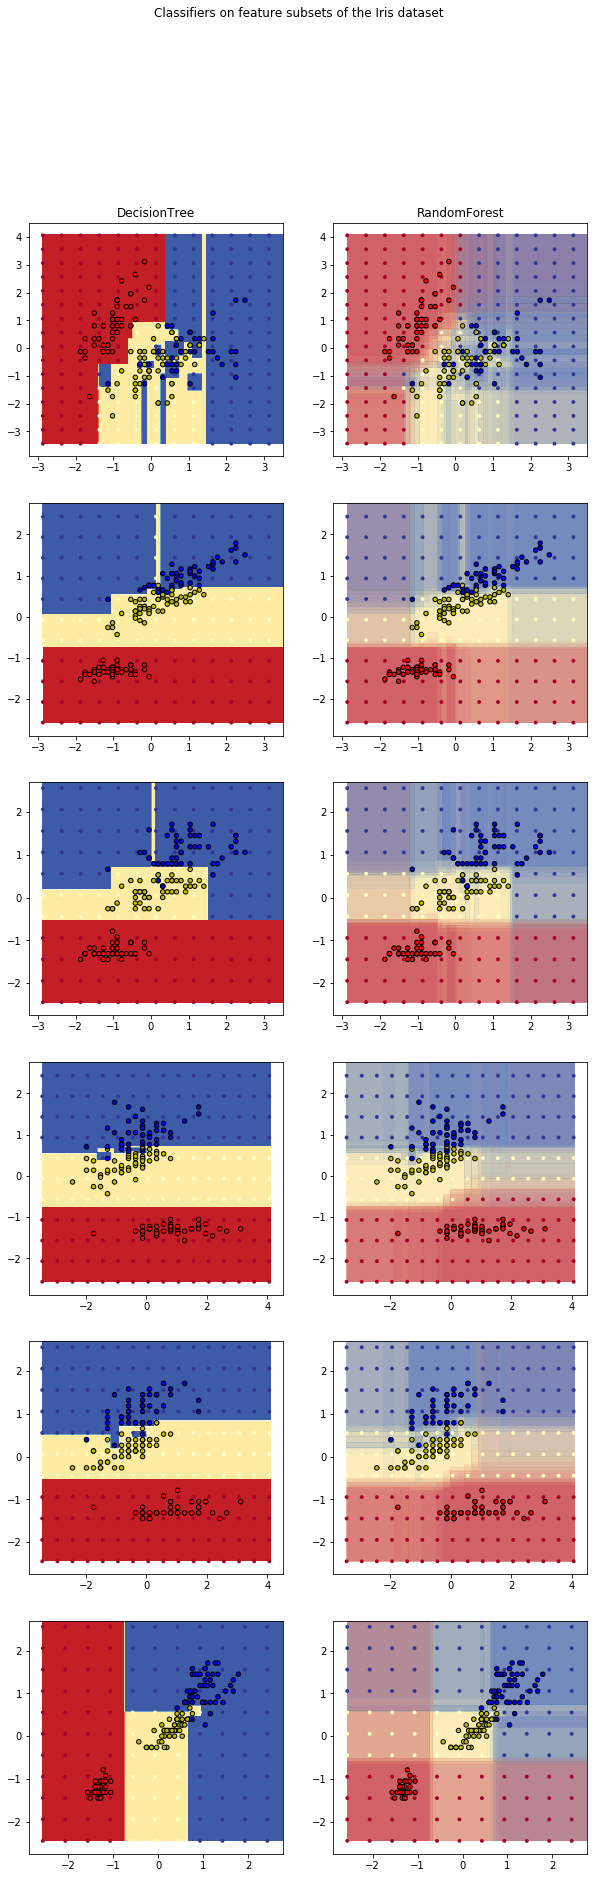

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

fit = plt.figure(figsize = (10, 30))

from sklearn import clone
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# parameters
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02 # fine step width for decision surface contours
plot_step_coarser = 0.5 # step widths for coarse classifier guesses
RANDOM_SEED = 13

# load data
iris = load_iris()

plot_idx = 1

models = [DecisionTreeClassifier(max_depth = None), 
             RandomForestClassifier(n_estimators = n_estimators)]

# Iterate through a pair of features (recall data is actually 4D)
# This is strictly for visualization later

for pair in ([0,1], [0,2], [0,3], [1,2],[1,3],[2,3]):
    for model in models:
        # We only take the two corresponding features
        X = iris.data[:, pair]
        y = iris.target

        # Shuffle
        idx = np.arange(X.shape[0])
        np.random.seed(RANDOM_SEED)
        np.random.shuffle(idx)
        X = X[idx]
        y = y[idx]

        # Standardize the data to mean = 0 and standard deviation of 1
        mean = X.mean(axis=0)
        std = X.std(axis=0)
        X = (X - mean) / std   # look, we are turning the data into Z-scores

        # Train
        clf = clone(model)   # snag a copy of the model from the list created above
        clf = model.fit(X, y) # Fit the model to this data

        scores = clf.score(X, y)
        
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(
            ".")[-1][:-2][:-len("Classifier")]

        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(
                len(model.estimators_))
        print(model_details + " with features", pair,
              "has a score of", scores)
        print()

        # 6 feature pairs (rows) and 2 models (columns) 
        plt.subplot(6, 2, plot_idx)
        if plot_idx <= len(models):
            # Add a title at the top of each column
            plt.title(model_title)

        # Now plot the decision boundary using a fine mesh as input to a
        # filled contour plot
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        # Plot either a single DecisionTreeClassifier or alpha blend the
        # decision surfaces of the ensemble of classifier
        if isinstance(model, DecisionTreeClassifier):
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=cmap)
        else:
            # Choose alpha blend level with respect to the number
            # of estimators
            # that are in use (noting that AdaBoost can use fewer estimators
            # than its maximum if it achieves a good enough fit early on)
            estimator_alpha = 1.0 / len(model.estimators_)
            for tree in model.estimators_:
                Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
                Z = Z.reshape(xx.shape)
                cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

        # Build a coarser grid to plot a set of ensemble classifications
        # to show how these are different to what we see in the decision
        # surfaces. These points are regularly space and do not have a
        # black outline
        xx_coarser, yy_coarser = np.meshgrid(
            np.arange(x_min, x_max, plot_step_coarser),
            np.arange(y_min, y_max, plot_step_coarser))
        Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                         yy_coarser.ravel()]
                                         ).reshape(xx_coarser.shape)
        cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                                c=Z_points_coarser, cmap=cmap,
                                edgecolors="none")

        # Plot the training points, these are clustered together and have a
        # black outline
        plt.scatter(X[:, 0], X[:, 1], c=y,
                    cmap=ListedColormap(['r', 'y', 'b']),
                    edgecolor='k', s=20)
        plot_idx += 1  # move on to the next plot in sequence

plt.suptitle("Classifiers on feature subsets of the Iris dataset")
plt.axis("tight")

plt.show()

## For feature selection

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# another type of random forest
from sklearn.ensemble import ExtraTreesClassifier

In [56]:
# build a classification task using 3 informative features

X, y = make_classification(n_samples = 1000, # 1k datapoints
                              n_features = 10, # 10 D data
                              n_informative = 3,
                              n_redundant = 0,
                              n_repeated = 0,
                              n_classes = 2, # 2 classes
                              random_state = 0,
                              shuffle = False)

In [73]:
X.shape

(1000, 10)

In [74]:
y.shape

(1000,)

In [62]:
# build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators = 250, random_state = 0)

In [63]:
forest

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [64]:
forest.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [67]:
# pull the feature importances from the model
importances = forest.feature_importances_
importances

array([ 0.17763201,  0.29590176,  0.20835127,  0.04712087,  0.04461413,
        0.04391181,  0.04630262,  0.04557492,  0.04601349,  0.04457711])

In [70]:
# compute the standard deviation of the feature importance for each feature of all trees
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis = 0)
std

array([ 0.06051993,  0.04230464,  0.06436972,  0.01396762,  0.01401046,
        0.01384792,  0.01307601,  0.01350302,  0.013044  ,  0.01475966])

In [72]:
# sort the data but get back the list of indices that were sorted with the data
# not the data itself
indices = np.argsort(importances)[::-1]
indices

array([1, 2, 0, 3, 6, 8, 7, 4, 9, 5], dtype=int64)

In [75]:
# print the feature ranking

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


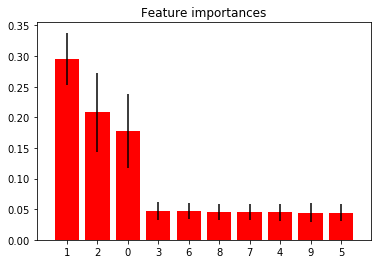

In [80]:
# plot the feature importances of the forest

plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color = "r", yerr = std[indices], align = "center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()